In [40]:
## import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectKBest

In [41]:
## to have plots in the notebook
%matplotlib inline  

## read in the entire dataset
## privacy suppressed mean missing data - reading all 'privacy suppressed' entries as NA
College_Scorecard = pd.read_csv('Most-Recent-Cohorts-Scorecard-Elements.csv', 
                                na_values='PrivacySuppressed')

## Data set exploration
## checking the number of instances and features in data set 
College_Scorecard.shape

In [44]:
## isolating all the numeric features that can be used with ML algorithms
low_num_index = list(College_Scorecard.columns).index('HCM2')
high_num_index = len(College_Scorecard.columns) - 1
num_indices = np.arange(low_num_index, high_num_index)
num_columns = College_Scorecard.columns[num_indices]

## converting the numeric variables in dataframe to numeric
College_Scorecard[num_columns] = College_Scorecard[num_columns].apply(pd.to_numeric)

In [45]:
## inspecting the dataset
College_Scorecard

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,0,3,...,NaN,0.8284,0.1049,30300.0,0.426,33888.0,347.789508,0.436968,NaN,0.324520
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,0,3,...,NaN,0.5214,0.2422,39700.0,0.665,21941.5,225.183649,0.785811,NaN,0.546105
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,...,NaN,0.7795,0.8540,40100.0,0.676,23370.0,239.844216,0.532134,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,...,NaN,0.4596,0.2640,45500.0,0.668,24097.0,247.305352,0.812445,NaN,0.472406
4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,...,NaN,0.7554,0.1270,26600.0,0.360,33118.5,339.892198,0.341237,NaN,0.257405
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,www.ua.edu/,financialaid.ua.edu/net-price-calculator/,0,3,...,NaN,0.4010,0.0853,41900.0,0.670,23750.0,243.744122,0.828453,NaN,0.661251
6,100760,100700,1007,Central Alabama Community College,Alexander City,AL,www.cacc.edu,www.cacc.edu/clientuploads/financial_aid/NetPr...,0,2,...,0.5055,0.3977,0.3153,27500.0,0.459,16127.0,165.509956,0.433913,0.115155,NaN
7,100812,100800,1008,Athens State University,Athens,AL,www.athens.edu,https://24.athens.edu/apex/prod8/f?p=174:1:394...,0,3,...,NaN,0.6296,0.6410,39000.0,0.666,18595.0,190.838819,0.786061,NaN,NaN
8,100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,www.aum.edu,www.aum.edu/admissions/financial-information/p...,0,3,...,NaN,0.5803,0.2930,35000.0,0.575,21335.0,218.959194,0.637709,NaN,0.241364
9,100858,100900,1009,Auburn University,Auburn,AL,www.auburn.edu,www.auburn.edu/admissions/money-matters.html,0,3,...,NaN,0.3494,0.0415,45700.0,0.725,21831.0,224.049597,0.908771,NaN,0.693542


In [46]:
## read in meta data
data_dict = pd.read_csv("data_dictionary.csv")

In [47]:
## Restricting the data dictionary to the features present within the College Scorecard dataset

## just retaining the vaiable id and name 
data_dict = data_dict[["VARIABLE NAME", "NAME OF DATA ELEMENT"]]
new_index = data_dict.loc[:,"VARIABLE NAME"].values.tolist()

## setting the variable name to index
data_dict = data_dict.set_index([new_index])[["NAME OF DATA ELEMENT"]]

## retaining only the variables within the College Scorecard dataset
data_dict = data_dict.loc[College_Scorecard.columns, "NAME OF DATA ELEMENT"]

In [48]:
## listing the descriptions of all variables/ features from the data dictionary - data exploration
for i in data_dict.index:
    print i, '-', data_dict[i]

UNITID - Unit ID for institution
OPEID - 8-digit OPE ID for institution
OPEID6 - 6-digit OPE ID for institution
INSTNM - Institution name
CITY - City
STABBR - State postcode
INSTURL - URL for institution's homepage
NPCURL - URL for institution's net price calculator
HCM2 - Schools that are on Heightened Cash Monitoring 2 by the Department of Education
 4 Entirely graduate-degree granting
CONTROL - Control of institution
LOCALE - Locale of institution
HBCU - Flag for Historically Black College and University
PBI - Flag for predominantly black institution
ANNHI - Flag for Alaska Native Native Hawaiian serving institution
TRIBAL - Flag for tribal college and university
AANAPII - Flag for Asian American Native American Pacific Islander-serving institution
HSI - Flag for Hispanic-serving institution
NANTI - Flag for Native American non-tribal institution
MENONLY - Flag for men-only college
WOMENONLY - Flag for women-only college
RELAFFIL - Religous affiliation of the institution
SATVR25 - 2

In [79]:
## checking number of colleges for which the repayments rates are available
College_Scorecard.shape[0] - sum(np.isnan(College_Scorecard.RPY_3YR_RT_SUPP.as_matrix()))

6116

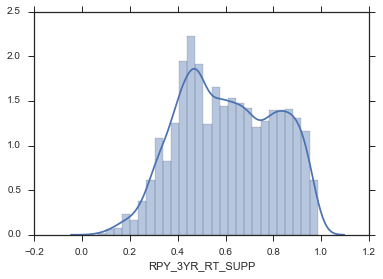

In [50]:
## checking the distribution of repayment rates across all colleges
sns.set_style("ticks")
hist_rpy = sns.distplot(College_Scorecard.RPY_3YR_RT_SUPP.dropna())
fig = hist_rpy.get_figure()
fig.savefig("hist_rpy.png", dpi=900) 

In [80]:
## summary of the 3 year loan repayment  
College_Scorecard.RPY_3YR_RT_SUPP.describe()

count    6116.000000
mean        0.608186
std         0.199428
min         0.064516
25%         0.456956
50%         0.596803
75%         0.779067
max         0.985410
Name: RPY_3YR_RT_SUPP, dtype: float64

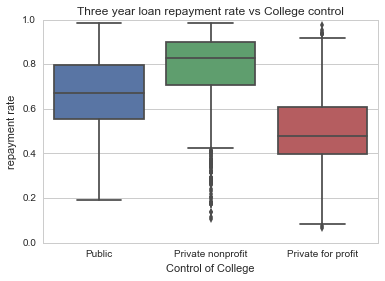

In [52]:
## Exploratory data analysis
## Repayment rates againt CONTROL of college
sns.set_style("whitegrid")

## getting the relevant data and transforming it
## renaming factor labels fror CONTROL
control = College_Scorecard.CONTROL
control = control.astype('category')
control = control.cat.rename_categories(['Public',
                                         'Private nonprofit',
                                         'Private for profit'])
repayment_rate = College_Scorecard.RPY_3YR_RT_SUPP

## Boxplot of repayment rate against CONTROL
box_plot_1 = sns.boxplot(x=control, 
                         y=repayment_rate);
box_plot_1.set(xlabel = 'Control of College', 
               ylabel = 'repayment rate',
               title = 'Three year loan repayment rate vs College control');
plt.show;

## saving boxplot in an image
fig = box_plot_1.get_figure()
fig.savefig("box_plot1.png", dpi=900) 

In [53]:
## getting the relevant data and transforming it
## renaming factor labels of PREDDEG
preddeg = College_Scorecard.PREDDEG
preddeg = preddeg.astype('category')
preddeg = preddeg.cat.rename_categories(["Not specified",
                                         "Predominantly Certificate",
                                         "Predominantly Associate's",
                                         "Predominantly Bachelor's",
                                         "Entirely Graduate"])
repayment_rate = College_Scorecard.RPY_3YR_RT_SUPP

## checking the ditribution of PREDDEG
preddeg.describe()

count                          7703
unique                            5
top       Predominantly Certificate
freq                           3343
dtype: object

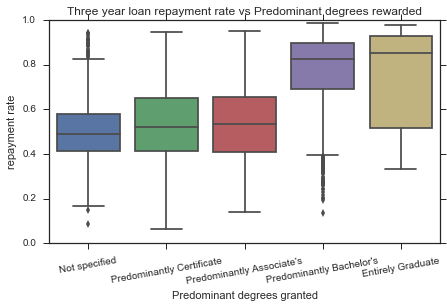

In [81]:
## boxplot of repayment rates against PREDDEG 

box_plot_2 = sns.boxplot(x=preddeg, 
                         y=repayment_rate);
box_plot_2.set(xlabel = 'Predominant degrees granted', 
               ylabel = 'repayment rate',
               title = 'Three year loan repayment rate vs Predominant degrees rewarded');

## rotating the a axis labels
for item in box_plot_2.get_xticklabels():
    item.set_rotation(10)

## setting fig aesthetics and saving plot in an image     
fig = box_plot_2.get_figure()
fig.set_size_inches(7, 4)

fig.savefig("box_plot2.png", dpi = 700)

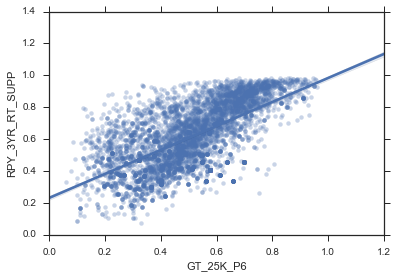

In [55]:
## Some more exploratory data analysis 

## percent earning more that 25K against repayment rates
sns.set_style("ticks")
sns.regplot(x="GT_25K_P6", y="RPY_3YR_RT_SUPP", 
            data=College_Scorecard, scatter_kws={'alpha':0.3})

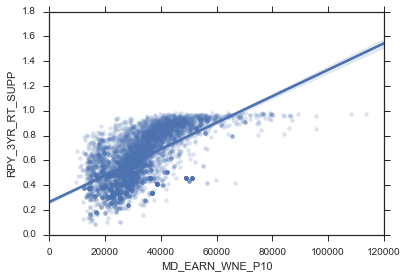

In [56]:
## median earnings against repayment rates
sns.regplot(x="MD_EARN_WNE_P10", y="RPY_3YR_RT_SUPP", data=College_Scorecard, scatter_kws={'alpha':0.2})

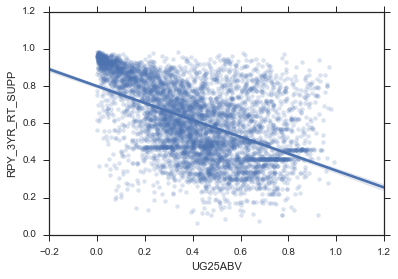

In [57]:
## percentage of students above 25 against repayment rates
sns.regplot(x="UG25ABV", y="RPY_3YR_RT_SUPP", data=College_Scorecard, scatter_kws={'alpha':0.2})

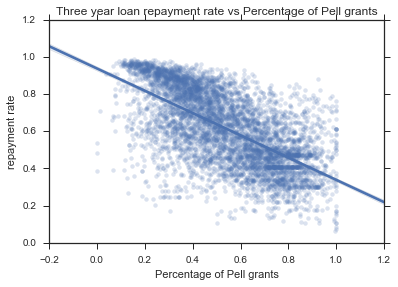

In [82]:
## percentage receiving PELL grants against repayment rates
scatter_chart = sns.regplot(x="PCTPELL", y="RPY_3YR_RT_SUPP", 
                         data=College_Scorecard, scatter_kws={'alpha':0.2})
scatter_chart.set(xlabel = 'Percentage of Pell grants', 
                  ylabel = 'repayment rate',
                  title = 'Three year loan repayment rate vs Percentage of Pell grants');

fig = scatter_chart.get_figure()

fig.savefig("line_chart.png", dpi = 700)

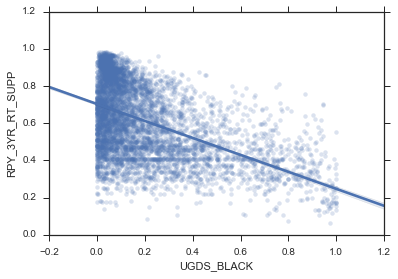

In [59]:
## percentage of black students and repayment rate
sns.regplot(x="UGDS_BLACK", y="RPY_3YR_RT_SUPP", data=College_Scorecard, scatter_kws={'alpha':0.2})

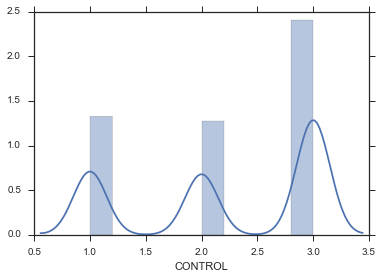

In [61]:
## checking the distribution of repayment rates across all colleges
sns.distplot(College_Scorecard.CONTROL.dropna())

In [63]:
## Keeping colleges with data on repayment rates
College_SC_RP = College_Scorecard.loc[(~np.isnan(College_Scorecard.RPY_3YR_RT_SUPP)).tolist(), :]

In [64]:
## number of colleges with data on repayment rates
College_SC_RP.shape

(6116, 122)

In [65]:
## removing all ID variables such as IDs, name, URL etc
## retaining numeric variables - lying between indices low_num_index and high_num_index
X_vars = College_Scorecard.columns[range(low_num_index, high_num_index)].tolist()
## removing the repayment rate variable - output
del X_vars[-2]

In [66]:
## Separate X and Y
X = College_SC_RP.loc[:, X_vars]
Y = College_SC_RP.loc[:, 'RPY_3YR_RT_SUPP']

In [67]:
## checking data types of all features:
print X.dtypes

HCM2                        int64
PREDDEG                     int64
CONTROL                     int64
LOCALE                    float64
HBCU                      float64
PBI                       float64
ANNHI                     float64
TRIBAL                    float64
AANAPII                   float64
HSI                       float64
NANTI                     float64
MENONLY                   float64
WOMENONLY                 float64
RELAFFIL                  float64
SATVR25                   float64
SATVR75                   float64
SATMT25                   float64
SATMT75                   float64
SATWR25                   float64
SATWR75                   float64
SATVRMID                  float64
SATMTMID                  float64
SATWRMID                  float64
ACTCM25                   float64
ACTCM75                   float64
ACTEN25                   float64
ACTEN75                   float64
ACTMT25                   float64
ACTMT75                   float64
ACTWR25       

In [68]:
## retaining the original features before imputation
X_orig = X.copy()

## carry out imputation 
## using median so that the imputed values are both valid for integer data and floating point data
for col in X.columns:
    X.loc[:, col] = X.loc[:, col].fillna(X.loc[:, col].median())   

In [69]:
X_orig

## check number of missing values for each feature
for col in X_orig.columns:
    print col, sum(np.isnan(X_orig.loc[:, col]))

HCM2 0
PREDDEG 0
CONTROL 0
LOCALE 393
HBCU 393
PBI 393
ANNHI 393
TRIBAL 393
AANAPII 393
HSI 393
NANTI 393
MENONLY 393
WOMENONLY 393
RELAFFIL 540
SATVR25 4953
SATVR75 4953
SATMT25 4940
SATMT75 4940
SATWR25 5410
SATWR75 5410
SATVRMID 4953
SATMTMID 4940
SATWRMID 5410
ACTCM25 4895
ACTCM75 4895
ACTEN25 5040
ACTEN75 5040
ACTMT25 5038
ACTMT75 5038
ACTWR25 5830
ACTWR75 5830
ACTCMMID 4895
ACTENMID 5040
ACTMTMID 5038
ACTWRMID 5830
SAT_AVG 4849
SAT_AVG_ALL 4743
PCIP01 418
PCIP03 418
PCIP04 418
PCIP05 418
PCIP09 418
PCIP10 418
PCIP11 418
PCIP12 418
PCIP13 418
PCIP14 418
PCIP15 418
PCIP16 418
PCIP19 418
PCIP22 418
PCIP23 418
PCIP24 418
PCIP25 418
PCIP26 418
PCIP27 418
PCIP29 418
PCIP30 418
PCIP31 418
PCIP38 418
PCIP39 418
PCIP40 418
PCIP41 418
PCIP42 418
PCIP43 418
PCIP44 418
PCIP45 418
PCIP46 418
PCIP47 418
PCIP48 418
PCIP49 418
PCIP50 418
PCIP51 418
PCIP52 418
PCIP54 418
DISTANCEONLY 393
UGDS 419
UGDS_WHITE 419
UGDS_BLACK 419
UGDS_HISP 419
UGDS_ASIAN 419
UGDS_AIAN 419
UGDS_NHPI 419
UGDS_2MOR 419


In [83]:
## --- PREPROCESSING ---
## converting CONTROL and PREDDEG into dummies and transforming income into log-income

from numpy import log
if ('CONTROL' in X.columns):
    control_dum = pd.get_dummies(X['CONTROL'], prefix = "control")
    X = pd.concat([X, control_dum], axis=1)
    X = X.drop('CONTROL', axis=1)
if ('PREDDEG' in X.columns):
    preddeg_dum = pd.get_dummies(X['PREDDEG'], prefix = "preddeg")
    X = pd.concat([X, preddeg_dum], axis=1)
    X = X.drop('PREDDEG', axis=1)
if ('MD_EARN_WNE_P10' in X.columns):
    log_md_wage = log(X['MD_EARN_WNE_P10'])
    X['log_md_earn'] = log_md_wage
    X = X.drop('MD_EARN_WNE_P10', axis=1)

In [71]:
## key implementing functions 

from sklearn.metrics import r2_score
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from time import time


def impute_missing(data):
    ''' Immputes missing data in the original dataset'''
    Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

def kBest_rgr(rgr, k=5):
    ''' fit the regressor using k best features'''
    anova_filter = SelectKBest(f_regression, k=k) 
    kbest_rgr = make_pipeline(anova_filter, rgr)
    return kbest_rgr
    
    
def train_regressor(rgr, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    
    rgr.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_r2(rgr, features, target):
    ''' Makes predictions using a fit regressor based on R2 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = rgr.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    
   
    return r2_score(target.values, y_pred)


def get_RMSE(rgr, X_train, y_train, X_test, y_test):
    ''' function to return mean squared error on the test set '''
    from sklearn.metrics import mean_squared_error
    from math import sqrt

    rgr = rgr
    rgr.fit(X_train, y_train)
    preds = rgr.predict(X_test)
    return sqrt(mean_squared_error(preds, y_test))
   
def train_predict(rgr, X_train, y_train, X_test, y_test):
    ''' Train and predict using a regressor based on R2 score. '''
    
    # Indicate the regressor and the training set size
    print "Training a {} using a training set size of {}. . .".format(rgr.__class__.__name__, len(X_train))
    
    # Train the regressor
    train_regressor(rgr, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "R2 score for training set: {:.4f}.".format(predict_r2(rgr, X_train, y_train))
    print "R2 score for test set: {:.4f}.".format(predict_r2(rgr, X_test, y_test))
    print "RMSE score for test set: {:.4f}.".format(get_RMSE(rgr, X_train, y_train, X_test, y_test))

In [72]:
## scaling the features into a seperate matrix scaled_X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [73]:
## inspecting the scaled features matrix
scaled_X

array([[ 0.        ,  0.03125   ,  1.        , ...,  1.        ,
         0.        ,  0.4677537 ],
       [ 0.        ,  0.03125   ,  0.        , ...,  1.        ,
         0.        ,  0.57672299],
       [ 0.        ,  0.03125   ,  0.        , ...,  1.        ,
         0.        ,  0.58076599],
       ..., 
       [ 0.        ,  0.3125    ,  0.        , ...,  0.        ,
         0.        ,  0.48084855],
       [ 0.        ,  0.3125    ,  0.        , ...,  0.        ,
         0.        ,  0.48084855],
       [ 0.        ,  0.3125    ,  0.        , ...,  0.        ,
         0.        ,  0.48084855]])

In [74]:
## first try simple validation techniques (Train Test splits)

from sklearn.cross_validation import train_test_split

## splitting unscaled features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=67)

## splitting scaled features
X_train_scld, X_test_scld, y_train_scld, y_test_scld = train_test_split(scaled_X, Y, test_size=0.20, random_state=67)
# Success
print "Training and testing split was successful."

Training and testing split was successful.


In [36]:
## applying SelectKBest to get 25 best features and retrieving f-scores of all features
selector = SelectKBest(f_regression, k=25).fit(X_train,y_train)
scores = selector.scores_

## listing the description of all features from data dictionary 
data_dict[X.columns.tolist()].tolist()

In [39]:
## constructing a data frame of features, their descriptions and f-scores
features_scores_df = pd.DataFrame.from_items([('features', X.columns),
                                              ('features_description', data_dict[X.columns.tolist()].tolist()),
                                              ('f-scores', scores.tolist())])
features_scores_df

features_scores_df.sort_values(by = 'f-scores', ascending=0)

,features,features_description,f-scores
98,PCTPELL,Percentage of undergraduates who receive a Pel...,3098.915340
105,GT_25K_P6,"Share of students earning over $25,000/year (t...",2874.977907
117,log_md_earn,NaN,2201.163168
111,control_3,NaN,2059.033280
115,preddeg_3,NaN,2028.312653
104,UG25ABV,Percentage of undergraduates aged 25 and above,1477.444468
76,UGDS_BLACK,Total share of enrollment of undergraduate deg...,1361.868421
110,control_2,NaN,1282.521942
72,PCIP54,Percentage of degrees awarded in History.,1068.103925
75,UGDS_WHITE,Total share of enrollment of undergraduate deg...,946.305324


In [ ]:
## --- fitting and evaluating models ---

In [76]:
## linear regression with feature selection

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## 25 features
train_predict(kBest_rgr(LinearRegression(), k = 25), X_train, y_train, X_test, y_test)
## 50 features
train_predict(kBest_rgr(LinearRegression(), k = 50), X_train, y_train, X_test, y_test)
## 118 features
train_predict(kBest_rgr(LinearRegression(), k = 118), X_train, y_train, X_test, y_test)

Training a Pipeline using a training set size of 4892. . .
Trained model in 0.1846 seconds
Made predictions in 0.0119 seconds.
R2 score for training set: 0.6735.
Made predictions in 0.0110 seconds.
R2 score for test set: 0.6619.
RMSE score for test set: 0.1166.
Training a Pipeline using a training set size of 4892. . .
Trained model in 0.1209 seconds
Made predictions in 0.0122 seconds.
R2 score for training set: 0.6983.
Made predictions in 0.0034 seconds.
R2 score for test set: 0.6925.
RMSE score for test set: 0.1112.
Training a Pipeline using a training set size of 4892. . .
Trained model in 0.1648 seconds
Made predictions in 0.0307 seconds.
R2 score for training set: 0.7413.
Made predictions in 0.0224 seconds.
R2 score for test set: 0.7235.
RMSE score for test set: 0.1055.


In [78]:
## Lasso
train_predict(Lasso(), X_train, y_train, X_test, y_test)

print "\nCross-validated results:"
train_predict(Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
                    normalize=False, positive=False, precompute=False, random_state=None,
                    selection='cyclic', tol=0.0001, warm_start=False), 
              X_train, y_train, X_test, y_test)

print "\n----RESULTS WITH SCALED FEATURES----"

train_predict(Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
                    normalize=False, positive=False, precompute=False, random_state=None,
                    selection='cyclic', tol=0.0001, warm_start=False), 
              X_train_scld, y_train_scld, X_test_scld, y_test_scld)

Training a Lasso using a training set size of 4892. . .
Trained model in 0.0695 seconds
Made predictions in 0.0039 seconds.
R2 score for training set: 0.3529.
Made predictions in 0.0009 seconds.
R2 score for test set: 0.3570.
RMSE score for test set: 0.1608.

Cross-validated results:
Training a Lasso using a training set size of 4892. . .
Trained model in 0.0711 seconds
Made predictions in 0.0043 seconds.
R2 score for training set: 0.3529.
Made predictions in 0.0010 seconds.
R2 score for test set: 0.3570.
RMSE score for test set: 0.1608.

----RESULTS WITH SCALED FEATURES----
Training a Lasso using a training set size of 4892. . .
Trained model in 0.0164 seconds
Made predictions in 0.0009 seconds.
R2 score for training set: 0.0000.
Made predictions in 0.0005 seconds.
R2 score for test set: -0.0000.
RMSE score for test set: 0.2006.


In [42]:
## Ridge regression
train_predict(Ridge(), X_train, y_train, X_test, y_test)

## Ridge regression with CV tuned parameters
print "\nCross-validated results:"
train_predict(Ridge(alpha = 1, tol = 0.001), X_train, y_train, X_test, y_test)

Training a Ridge using a training set size of 4892. . .
Trained model in 0.0193 seconds
Made predictions in 0.0034 seconds.
R2 score for training set: 0.7401.
Made predictions in 0.0008 seconds.
R2 score for test set: 0.7324.
RMSE score for test set: 0.1037.

Cross-validated results:
Training a Ridge using a training set size of 4892. . .
Trained model in 0.0127 seconds
Made predictions in 0.0033 seconds.
R2 score for training set: 0.7401.
Made predictions in 0.0006 seconds.
R2 score for test set: 0.7324.
RMSE score for test set: 0.1037.


In [43]:
## Decision Tree Regressor 
train_predict(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

print "\nCross-validated results:"
## Decision Tree Regressor with CV tuned parameters 
train_predict(DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
              max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'), 
              X_train, y_train, X_test, y_test)

Training a DecisionTreeRegressor using a training set size of 4892. . .
Trained model in 0.2567 seconds
Made predictions in 0.0063 seconds.
R2 score for training set: 0.9995.
Made predictions in 0.0013 seconds.
R2 score for test set: 0.5563.
RMSE score for test set: 0.1334.

Cross-validated results:
Training a DecisionTreeRegressor using a training set size of 4892. . .
Trained model in 0.1291 seconds
Made predictions in 0.0053 seconds.
R2 score for training set: 0.7597.
Made predictions in 0.0010 seconds.
R2 score for test set: 0.6584.
RMSE score for test set: 0.1166.


In [44]:
## Decision Tree Regressor with K=86 - evaluated using cross validation
train_predict(kBest_rgr(DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'), k = 86), X_train, y_train, X_test, y_test)

Training a Pipeline using a training set size of 4892. . .
Trained model in 0.1511 seconds
Made predictions in 0.0072 seconds.
R2 score for training set: 0.7899.
Made predictions in 0.0017 seconds.
R2 score for test set: 0.6535.
RMSE score for test set: 0.1184.


In [45]:
##Princpal Components Regression
## How do I explain the negative R2 obtained from a PC regression

from sklearn.cross_decomposition import PLSRegression
train_predict(PLSRegression(n_components=2), X_train, y_train, X_test, y_test)

Training a PLSRegression using a training set size of 4892. . .
Trained model in 0.0313 seconds
Made predictions in 0.0095 seconds.
R2 score for training set: -223.3506.
Made predictions in 0.0020 seconds.
R2 score for test set: -238.2121.
RMSE score for test set: 3.1021.


In [48]:
## fit a model using cross validation 


# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.cross_validation import ShuffleSplit

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

## evaluates best model parameters for a given model using cross validation
def fit_model(regressor, params, X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data (cross validation n = 5?)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = regressor
    # Params should be like this in the form of a dict
    # params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)


    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
## Evaluating optimal model settings using cross validation

In [71]:
## -- Do not run again !!! ##
## cross validation takes time
fit_model(regressor = Ridge(), 
          params = {'alpha': np.arange(0,1000)},
          X = X, y = Y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
## -- Do not run again !!! ##
fit_model(regressor = Lasso(), 
          params = {'alpha': np.arange(1,1000)},
          X = X, y = Y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
fit_model(regressor = DecisionTreeRegressor(), 
          params = {'max_depth': range(1,11)},
          X = X, y = Y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [51]:
## Decsion Tree regressor with K features, K, max_depth and min_samples_split evaluated
## through cross validation
## --- do not run again, takes time ---  
from sklearn.pipeline import Pipeline
kbest = SelectKBest(f_regression)
pipeline = Pipeline([('kbest', kbest), ('dr', DecisionTreeRegressor())])
grid_search = GridSearchCV(pipeline, {'dr__min_samples_split': range(2, 10, 2), 
                                      'dr__max_depth': range(1,11),
                                      'kbest__k' : range(1, 100, 5)})
model = grid_search.fit(X, Y)
model.best_estimator_

/Users/Air/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in divide
  corr /= np.asarray(np.sqrt(safe_sqr(X).sum(axis=0))).ravel()
/Users/Air/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/Air/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/Air/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1749: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Pipeline(steps=[('kbest', SelectKBest(k=86, score_func=<function f_regression at 0x116fd5de8>)), ('dr', DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))])

In [61]:
## checking the chosen ridge regression model for robustness/ consistency 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=i)

    # Success
    print "Training and testing split was successful."
    
    ## Ridge regression with CV tuned parameters
    print "\nCross-validated results:"
    train_predict(Ridge(alpha = 1, tol = 0.001), X_train, y_train, X_test, y_test)

Training and testing split was successful.

Cross-validated results:
Training a Ridge using a training set size of 4892. . .
Trained model in 0.0285 seconds
Made predictions in 0.0034 seconds.
R2 score for training set: 0.7410.
Made predictions in 0.0019 seconds.
R2 score for test set: 0.7295.
RMSE score for test set: 0.1042.
Training and testing split was successful.

Cross-validated results:
Training a Ridge using a training set size of 4892. . .
Trained model in 0.0180 seconds
Made predictions in 0.0035 seconds.
R2 score for training set: 0.7372.
Made predictions in 0.0014 seconds.
R2 score for test set: 0.7454.
RMSE score for test set: 0.0993.
Training and testing split was successful.

Cross-validated results:
Training a Ridge using a training set size of 4892. . .
Trained model in 0.0153 seconds
Made predictions in 0.0043 seconds.
R2 score for training set: 0.7455.
Made predictions in 0.0013 seconds.
R2 score for test set: 0.7104.
RMSE score for test set: 0.1061.
Training and tes